# A simple VWAP Profile

In [36]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import pandas as pd
from sklearn import linear_model as linear_model

matplotlib.rcParams['figure.figsize'] = (14, 6)

# data source: alphavantage.co

In [37]:
ticker = "AAPL"
bars = pd.read_csv('./Feb_2_2018_Data/' + ticker +'.csv', index_col = 0, parse_dates = True )

# fix sort order
bars = bars.sort_index(ascending=True )

# what if we eliminate the dates we don't like?
#bars = bars[ '01-24-2018':'02-04-2018' ]

In [38]:
# calculate the cumulative pct by day
totl_volume = bars.groupby( [ bars.index.date ] ).tail( 1 )[ 'volume' ] 
bars[ 'accum_volume' ] = bars.groupby( [ bars.index.date ] ).cumsum()[ 'volume' ] 
bars[ 'accum_pct' ] = bars.groupby( [ bars.index.date ] )[ 'accum_volume' ].transform( lambda x: x / x.iloc[ -1 ] )

# add a minute bin
# US start of date, calc in minutes
start_of_day = (9 * 60) + 30
# get the time for each bin in minutes and subtract 9:30
bars[ 'minute_bars' ] = (bars.index.hour * 60) + bars.index.minute - start_of_day

In [39]:
bars['accum_pct']['2018-01-25']

timestamp
2018-01-25 09:30:00    0.012258
2018-01-25 09:31:00    0.017578
2018-01-25 09:32:00    0.021843
2018-01-25 09:33:00    0.026869
2018-01-25 09:34:00    0.030734
2018-01-25 09:35:00    0.033426
2018-01-25 09:36:00    0.037672
2018-01-25 09:37:00    0.040610
2018-01-25 09:38:00    0.044220
2018-01-25 09:39:00    0.050266
2018-01-25 09:40:00    0.053188
2018-01-25 09:41:00    0.055915
2018-01-25 09:42:00    0.058311
2018-01-25 09:43:00    0.060812
2018-01-25 09:44:00    0.063191
2018-01-25 09:45:00    0.066876
2018-01-25 09:46:00    0.069306
2018-01-25 09:47:00    0.072279
2018-01-25 09:48:00    0.075539
2018-01-25 09:49:00    0.077545
2018-01-25 09:50:00    0.079564
2018-01-25 09:51:00    0.087027
2018-01-25 09:52:00    0.090914
2018-01-25 09:53:00    0.093600
2018-01-25 09:54:00    0.096026
2018-01-25 09:55:00    0.097747
2018-01-25 09:56:00    0.104680
2018-01-25 09:57:00    0.120656
2018-01-25 09:58:00    0.125519
2018-01-25 09:59:00    0.128217
                         ...  

In [ ]:
bars['minute_bars']

In [41]:
# arrange our data
minute_bars = bars[ 'minute_bars' ]
X = pd.DataFrame( { 'bin': minute_bars, 
                    'bin2' : minute_bars**2, 
                    'bin3' : minute_bars**3, 
                    'bin4' : minute_bars**4, 
                    'bin5' : minute_bars**5 } )
y = bars[ 'accum_pct' ]

In [42]:
# now do the regression
lm = linear_model.LinearRegression()
model = lm.fit( X, y )
predictions = lm.predict( X )
# Rsquared
lm.score( X, y )

0.9447210758107566

In [43]:
# coefficients
lm.coef_

array([ 5.95499314e-03, -4.18782129e-05,  2.04745995e-07, -5.04842122e-10,
        4.96279325e-13])

In [ ]:
lm.intercept_

In [44]:
# now do the regression with no intercept
lm2 = linear_model.LinearRegression( fit_intercept = False )
model = lm2.fit( X, y )
predictions = lm2.predict( X )

# Rsquared
lm2.score( X, y )

0.9440160707177043

In [45]:
lm2.coef_

array([ 7.50556384e-03, -6.30546072e-05,  3.26758999e-07, -8.17293518e-10,
        7.89660916e-13])

In [47]:
lm2.intercept_

0.0

In [46]:
def vwap_target( bar_num, coefs ):
    return ( coefs[ 0 ] * bar_num + 
             coefs[ 1 ] * bar_num**2 + 
             coefs[ 2 ] * bar_num**3 +
             coefs[ 3 ] * bar_num**4 +
             coefs[ 4 ] * bar_num**5 )

In [48]:
bins = np.arange(0,391)
tgts = vwap_target( bins, lm2.coef_ )

In [50]:
tgts

array([0.        , 0.00744284, 0.01476151, 0.02195796, 0.02903409,
       0.03599179, 0.04283294, 0.0495594 , 0.05617299, 0.06267554,
       0.06906884, 0.07535467, 0.08153479, 0.08761094, 0.09358485,
       0.09945821, 0.10523271, 0.11091003, 0.11649181, 0.12197968,
       0.12737527, 0.13268015, 0.13789592, 0.14302413, 0.14806632,
       0.15302403, 0.15789876, 0.162692  , 0.16740523, 0.17203989,
       0.17659744, 0.1810793 , 0.18548687, 0.18982154, 0.19408468,
       0.19827766, 0.2024018 , 0.20645845, 0.21044889, 0.21437444,
       0.21823635, 0.22203589, 0.22577431, 0.22945283, 0.23307266,
       0.23663501, 0.24014105, 0.24359195, 0.24698886, 0.25033291,
       0.25362523, 0.25686693, 0.26005909, 0.26320279, 0.26629908,
       0.26934903, 0.27235366, 0.27531398, 0.27823101, 0.28110572,
       0.2839391 , 0.28673211, 0.2894857 , 0.29220079, 0.29487831,
       0.29751916, 0.30012424, 0.30269442, 0.30523058, 0.30773356,
       0.3102042 , 0.31264333, 0.31505176, 0.31743029, 0.31977

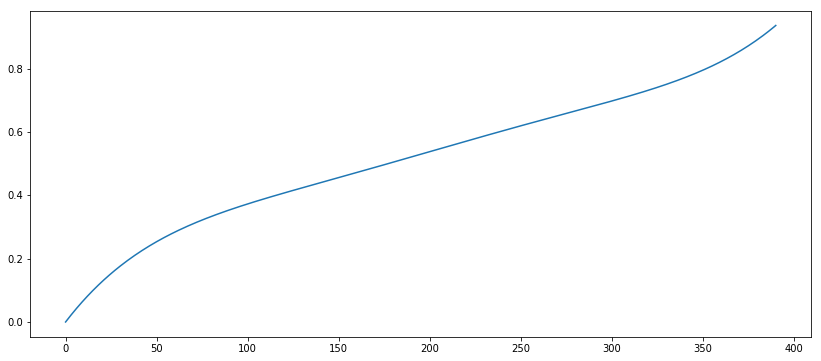

In [51]:
plt.plot(tgts)

In [ ]:
tgts[-1]

In [ ]:
# or is there something about this that keeps it from getting to 1.0 that I'm forgetting?
bars.index

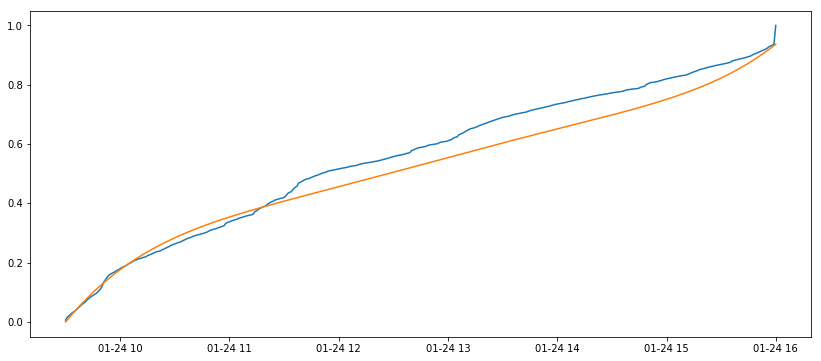

In [52]:
tgt_date = '1-24-2018'
plt.plot(bars[tgt_date]['accum_pct'])
tgtsSeries = pd.Series(tgts)
tgtsSeries.index = bars[tgt_date].index
plt.plot(tgtsSeries)
plt.show()